In [1]:
import pandas as pd
df_train = pd.read_csv("all_agree.csv")
df_train

,title,label,label_score
0,"Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...",non-clickbait,0
1,Malaysia Sudutkan RI: Isu Kabut Asap hingga In...,non-clickbait,0
2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,clickbait,1
3,"Kemensos Salurkan Rp 7,3 M bagi Korban Kerusuh...",non-clickbait,0
4,MPR: Amandemen UUD 1945 Tak Akan Melebar ke Ma...,non-clickbait,0
...,...,...,...
8608,Twice Rilis Teaser MV 'Feel Special' Jelang Co...,clickbait,1
8609,"Asap Karhutla Riau Mulai Merambah Ke Nias, BM...",non-clickbait,0
8610,"Tolak RUU Pertanahan, Ribuan Petani Siap Gelar...",non-clickbait,0
8611,Ada Niat Tambah Momongan Tanpa Ikut Program Ha...,clickbait,1


In [2]:
df_train['label'].value_counts()

label
non-clickbait    5297
clickbait        3316
Name: count, dtype: int64

In [3]:
import re
def preprocessed(text):
    # Pastikan input berupa string
    if not isinstance(text, str):
        return text  # Jika bukan string, kembalikan nilainya tanpa perubahan
    
    # Konversi ke huruf kecil
    text = text.lower()

    # Menghapus non-alfabetik kecuali angka dan spasi
    # text = re.sub(r'[^a-zA-Z0-9\s]+', '', text)

    return text

df_train['title_clean'] = df_train['title'].apply(preprocessed)
df_train

,title,label,label_score,title_clean
0,"Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...",non-clickbait,0,"masuk radar pilwalkot medan, menantu jokowi be..."
1,Malaysia Sudutkan RI: Isu Kabut Asap hingga In...,non-clickbait,0,malaysia sudutkan ri: isu kabut asap hingga in...
2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,clickbait,1,viral! driver ojol di bekasi antar pesanan mak...
3,"Kemensos Salurkan Rp 7,3 M bagi Korban Kerusuh...",non-clickbait,0,"kemensos salurkan rp 7,3 m bagi korban kerusuh..."
4,MPR: Amandemen UUD 1945 Tak Akan Melebar ke Ma...,non-clickbait,0,mpr: amandemen uud 1945 tak akan melebar ke ma...
...,...,...,...,...
8608,Twice Rilis Teaser MV 'Feel Special' Jelang Co...,clickbait,1,twice rilis teaser mv 'feel special' jelang co...
8609,"Asap Karhutla Riau Mulai Merambah Ke Nias, BM...",non-clickbait,0,"asap karhutla riau mulai merambah ke nias, bm..."
8610,"Tolak RUU Pertanahan, Ribuan Petani Siap Gelar...",non-clickbait,0,"tolak ruu pertanahan, ribuan petani siap gelar..."
8611,Ada Niat Tambah Momongan Tanpa Ikut Program Ha...,clickbait,1,ada niat tambah momongan tanpa ikut program ha...


In [4]:
# Memisahkan fitur teks ('Judul_clean') dan target ('Labeling')
X = df_train['title_clean']  # Kolom teks untuk prediksi
y = df_train['label']     # Target (label)

## EDA

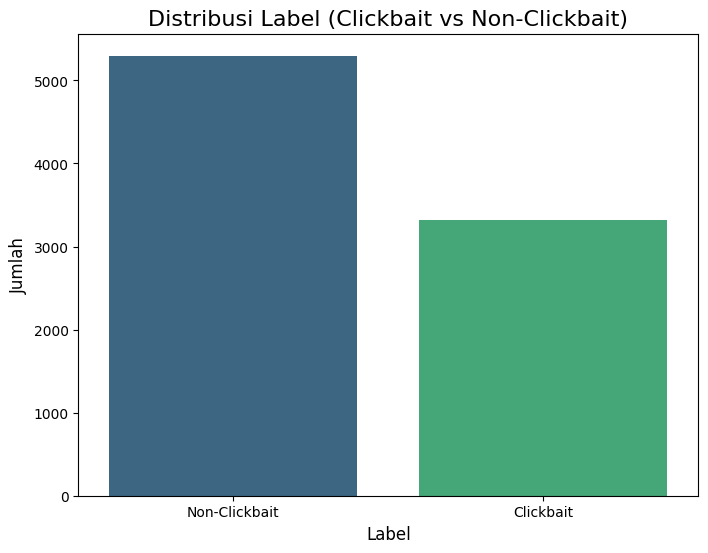

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi label
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_train, palette='viridis')
plt.title('Distribusi Label (Clickbait vs Non-Clickbait)', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Clickbait', 'Clickbait'], fontsize=10)
plt.show()

In [6]:
df_train['label'].value_counts()

label
non-clickbait    5297
clickbait        3316
Name: count, dtype: int64

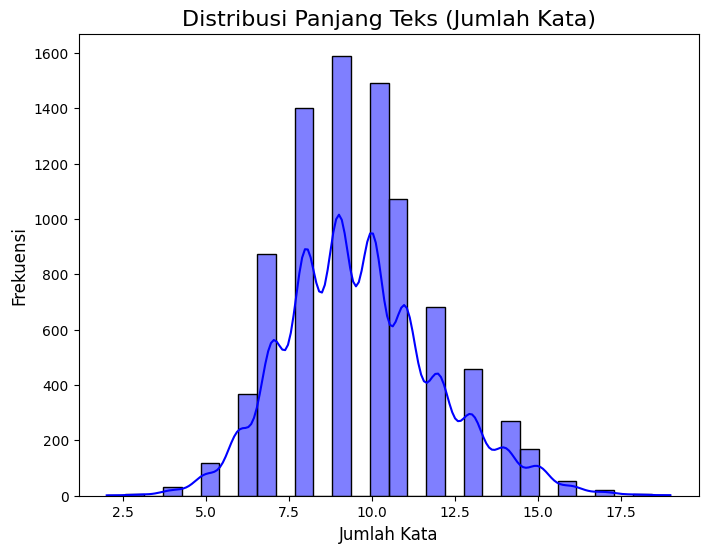

In [7]:
# Tambahkan kolom panjang teks
df_train['title_clean_split'] = df_train['title_clean'].apply(lambda x: len(x.split()))

# Visualisasi panjang teks
plt.figure(figsize=(8, 6))
sns.histplot(df_train['title_clean_split'], kde=True, color='blue', bins=30)
plt.title('Distribusi Panjang Teks (Jumlah Kata)', fontsize=16)
plt.xlabel('Jumlah Kata', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


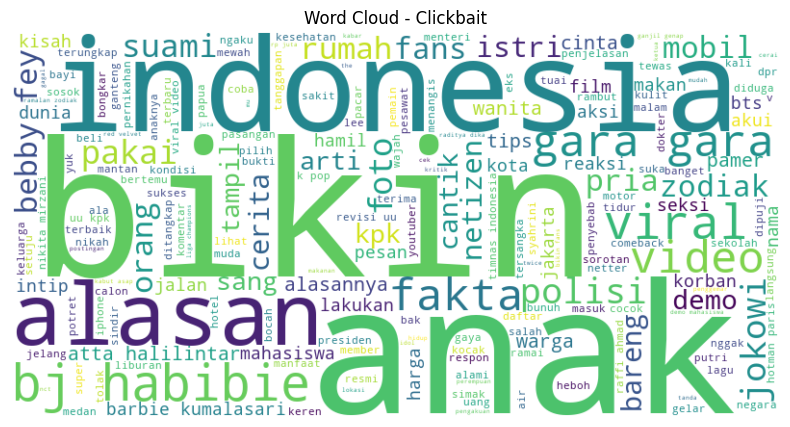

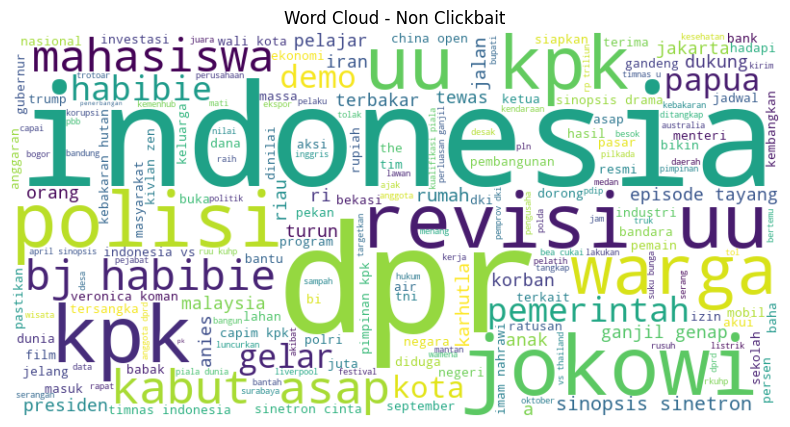

In [8]:
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Unduh stopwords jika diperlukan
nltk.download('stopwords')

# Mengambil stopwords bahasa Inggris dari NLTK (atau bisa diganti dengan stopwords bahasa lain jika diperlukan)
id_stopwords = set(stopwords.words('indonesian'))

# Menambahkan stopwords tambahan jika diperlukan
# custom_stopwords = id_stopwords.union({"monkeypox", "cacar monyet", "cacar"})

text_cb = ' '.join(df_train[df_train['label_score'] == 1]['title_clean'])
text_ncb = ' '.join(df_train[df_train['label_score'] == 0]['title_clean'])

# Buat WordCloud untuk setiap kategori emosi
wordcloud_cb = WordCloud(width=800, height=400,
                        background_color='white',
                        stopwords=id_stopwords).generate(text_cb)

# Plot WordCloud untuk kategori emosi
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_cb, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud - Clickbait")
plt.show()

# Buat WordCloud untuk setiap kategori emosi
wordcloud_ncb = WordCloud(width=800, height=400,
                        background_color='white',
                        stopwords=id_stopwords).generate(text_ncb)

# Plot WordCloud untuk kategori emosi
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ncb, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud - Non Clickbait")
plt.show()



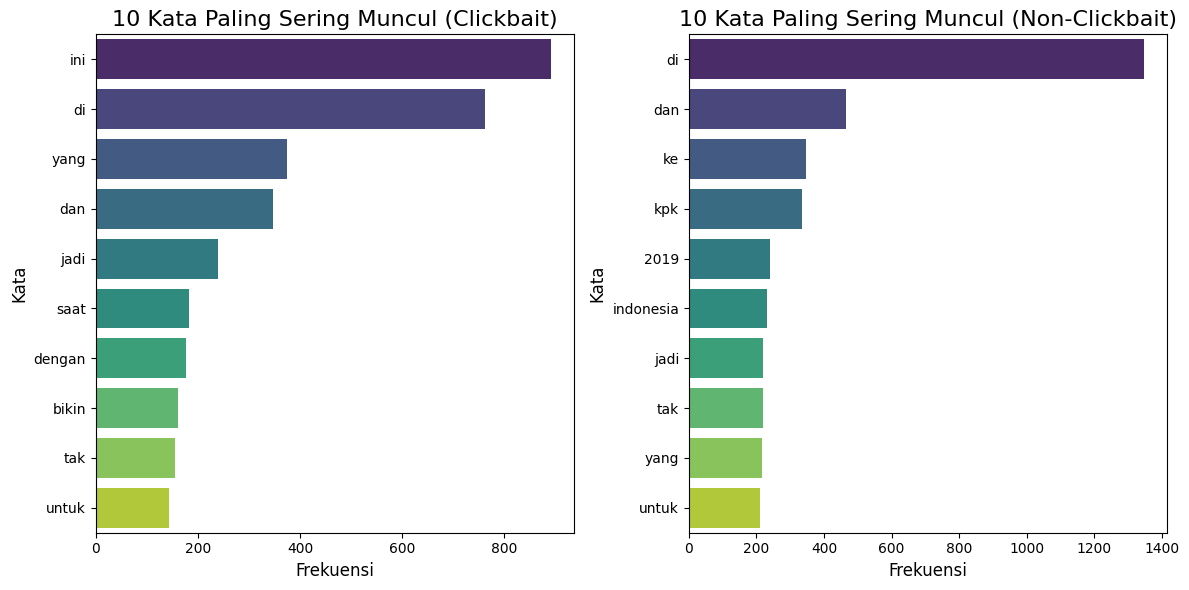

In [9]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan data berdasarkan label
# clickbait_text = ' '.join(df_train[df_train['Labeling'] == 1]['Judul_clean']).split()
# non_clickbait_text = ' '.join(df_train[df_train['Labeling'] == 0]['Judul_clean']).split()
text_cb = ' '.join(df_train[df_train['label_score'] == 1]['title_clean']).split()
text_ncb = ' '.join(df_train[df_train['label_score'] == 0]['title_clean']).split()

# Hitung frekuensi kata untuk masing-masing label
clickbait_word_counts = Counter(text_cb)
non_clickbait_word_counts = Counter(text_ncb)

# Ambil 10 kata paling sering untuk masing-masing label
clickbait_common_words = clickbait_word_counts.most_common(10)
non_clickbait_common_words = non_clickbait_word_counts.most_common(10)

# Pisahkan kata dan frekuensi
clickbait_words, clickbait_counts = zip(*clickbait_common_words)
non_clickbait_words, non_clickbait_counts = zip(*non_clickbait_common_words)

# Visualisasi kata paling sering untuk Clickbait dan Non-Clickbait
plt.figure(figsize=(12, 6))

# Subplot untuk Clickbait
plt.subplot(1, 2, 1)
sns.barplot(x=list(clickbait_counts), y=list(clickbait_words), palette='viridis')
plt.title('10 Kata Paling Sering Muncul (Clickbait)', fontsize=16)
plt.xlabel('Frekuensi', fontsize=12)
plt.ylabel('Kata', fontsize=12)

# Subplot untuk Non-Clickbait
plt.subplot(1, 2, 2)
sns.barplot(x=list(non_clickbait_counts), y=list(non_clickbait_words), palette='viridis')
plt.title('10 Kata Paling Sering Muncul (Non-Clickbait)', fontsize=16)
plt.xlabel('Frekuensi', fontsize=12)
plt.ylabel('Kata', fontsize=12)

plt.tight_layout()
plt.show()


## Modeling

In [ ]:
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model_path, features, df_train):
    # Memuat model
    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    # Prediksi dengan model
    predictions = model.predict(features)
    df_train['Prediction'] = predictions

    # Mapping prediksi
    df_train['Mapped_Prediction'] = df_train['Prediction'].map({'clickbait': 1, 'non-clickbait': 0})

    # Misalkan df_train memiliki kolom 'Labeling'
    y_true = df_train['Labeling']
    y_pred = df_train['Mapped_Prediction']

    # Menghitung accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Menghitung F1-score
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Membuat confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Menampilkan confusion matrix dengan visualisasi
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()



In [ ]:
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model_path, features, df_train, misclassified_output_path):
    # Memuat model
    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    # Prediksi dengan model
    predictions = model.predict(features)
    df_train['Prediction'] = predictions

    # Mapping prediksi
    df_train['Mapped_Prediction'] = df_train['Prediction'].map({'clickbait': 1, 'non-clickbait': 0})

    # Misalkan df_train memiliki kolom 'Labeling'
    y_true = df_train['Labeling']
    y_pred = df_train['Mapped_Prediction']

    # Menghitung accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Menghitung F1-score
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Membuat confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Menampilkan confusion matrix dengan visualisasi
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Menyimpan data yang salah diprediksi
    df_train['Misclassified'] = df_train['Mapped_Prediction'] != df_train['Labeling']
    misclassified = df_train[df_train['Misclassified']]

    if not misclassified.empty:
        misclassified.to_csv(misclassified_output_path, index=False)
        print(f"Data salah prediksi telah disimpan ke {misclassified_output_path}")
    else:
        print("Tidak ada data yang salah prediksi.")


### TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat TF-IDF vectorizer dan mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer(max_features=500)
features_tfidf = vectorizer.fit_transform(X).toarray()


Accuracy: 0.65
F1 Score: 0.67


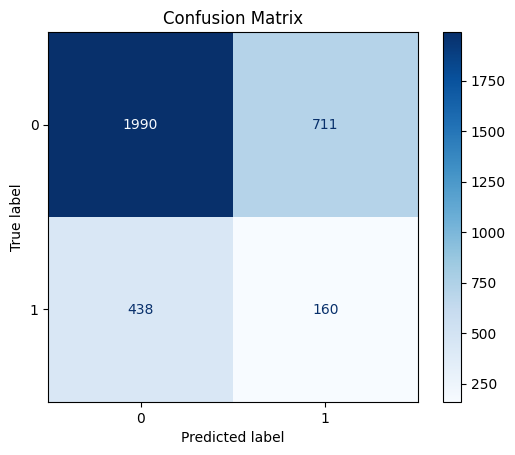

Data salah prediksi telah disimpan ke misclassified_tfidf_rf.csv
Accuracy: 0.46
F1 Score: 0.52


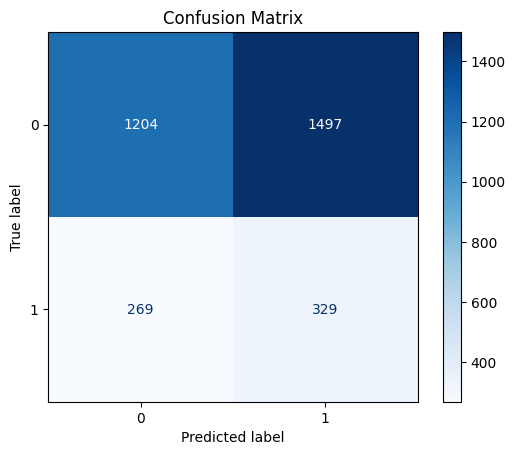

Data salah prediksi telah disimpan ke misclassified_tfidf_nb.csv
Accuracy: 0.52
F1 Score: 0.57


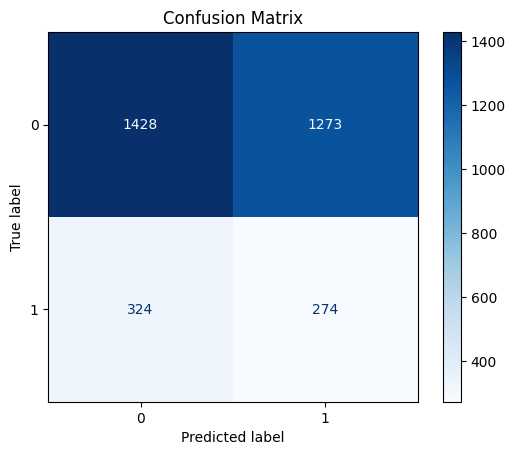

Data salah prediksi telah disimpan ke misclassified_tfidf_svm.csv
Accuracy: 0.70
F1 Score: 0.70


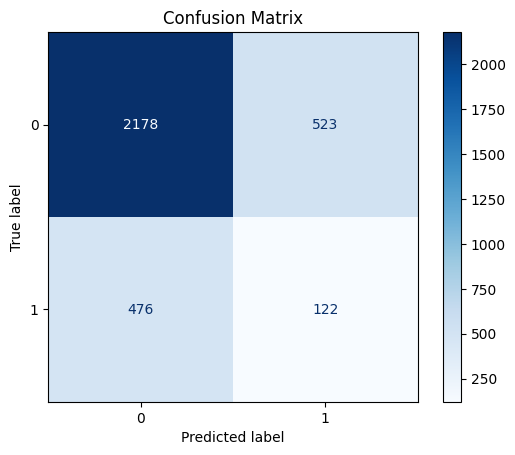

Data salah prediksi telah disimpan ke misclassified_tfidf_knn.csv


In [ ]:
evaluate_model('models/TF-IDF_Random Forest.pkl', features_tfidf, df_train, 'misclassified_tfidf_rf.csv')
evaluate_model('models/TF-IDF_Naive Bayes.pkl', features_tfidf, df_train, 'misclassified_tfidf_nb.csv')
evaluate_model('models/TF-IDF_SVM.pkl', features_tfidf, df_train, 'misclassified_tfidf_svm.csv')
evaluate_model('models/TF-IDF_KNN.pkl', features_tfidf, df_train, 'misclassified_tfidf_knn.csv')

### Bag of Words (BoW)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def extract_bow(X_test, max_features=500): 
    # Membuat objek CountVectorizer dengan max_features
    vectorizer = CountVectorizer(max_features=max_features)
    
    # Menyesuaikan vektor dengan data uji menggunakan transform (bukan fit_transform)
    test_features = vectorizer.fit_transform(X_test).toarray()
    
    return test_features

# Mengekstrak fitur menggunakan BoW
features_bow = extract_bow(X, max_features=500)

Accuracy: 0.66
F1 Score: 0.68


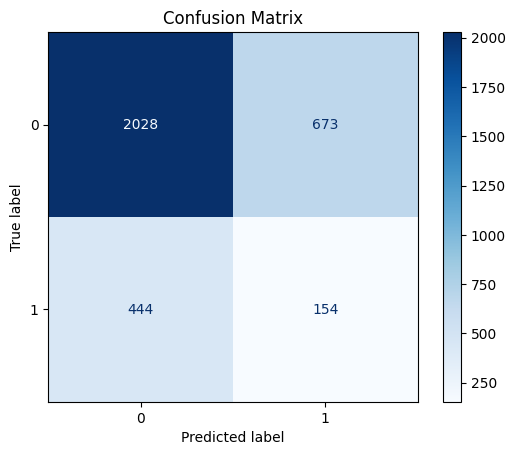

Data salah prediksi telah disimpan ke misclassified_bow_rf.csv
Accuracy: 0.46
F1 Score: 0.52


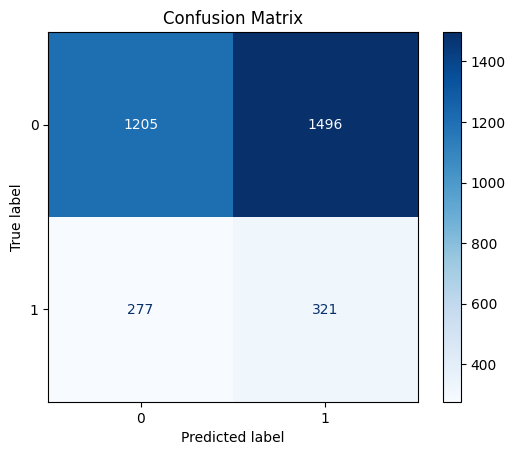

Data salah prediksi telah disimpan ke misclassified_bow_nb.csv
Accuracy: 0.50
F1 Score: 0.56


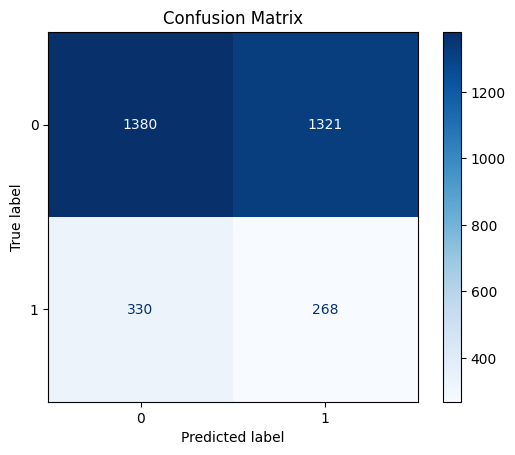

Data salah prediksi telah disimpan ke misclassified_bow_svm.csv
Accuracy: 0.72
F1 Score: 0.72


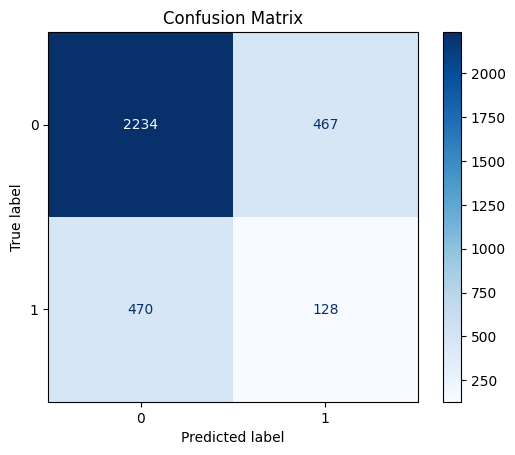

Data salah prediksi telah disimpan ke misclassified_bow_knn.csv


In [ ]:
evaluate_model('models/Bag of Words (BOW)_Random Forest.pkl', features_bow, df_train, 'misclassified_bow_rf.csv')
evaluate_model('models/Bag of Words (BOW)_Naive Bayes.pkl', features_bow, df_train, 'misclassified_bow_nb.csv')
evaluate_model('models/Bag of Words (BOW)_SVM.pkl', features_bow, df_train, 'misclassified_bow_svm.csv')
evaluate_model('models/Bag of Words (BOW)_KNN.pkl', features_bow, df_train, 'misclassified_bow_knn.csv')

### GloVe

In [17]:
import numpy as np

def extract_glove(X_test, glove_path): 
    # Memuat GloVe model
    glove_model = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding

    def embed(texts):
        # Menghitung rata-rata vektor untuk setiap teks
        features = []
        for text in texts:
            words = text.split()  # Menghitung kata per kata
            word_vectors = [glove_model[word] for word in words if word in glove_model]  # Ambil vektor GloVe
            if len(word_vectors) == 0:  # Jika tidak ada kata yang ditemukan, gunakan vektor nol
                features.append(np.zeros(300))  # GloVe vektor ukuran 300
            else:
                features.append(np.mean(word_vectors, axis=0))  # Rata-rata vektor kata
        return np.array(features)

    # Ekstraksi fitur untuk X_test
    test_features = embed(X_test)
    return test_features

# Path ke file GloVe (misal, 'glove.6B.300d.txt')
glove_path = 'glove.6B.300d.txt'

# Ekstraksi fitur
features_glove = extract_glove(X, glove_path)

# Menampilkan bentuk hasil
print(features_glove.shape)  # (jumlah_teks, 300)


(3299, 300)


Accuracy: 0.62
F1 Score: 0.66


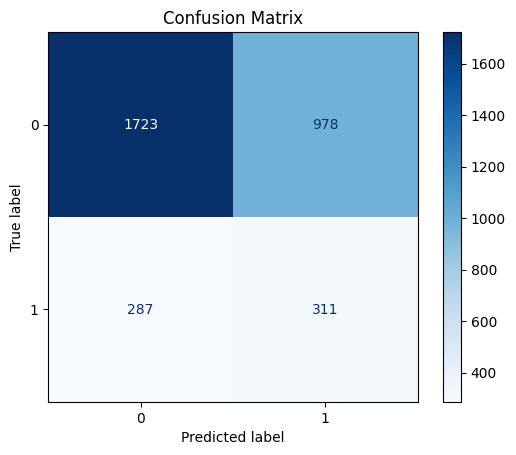

Data salah prediksi telah disimpan ke misclassified_glove_rf.csv
Accuracy: 0.59
F1 Score: 0.64


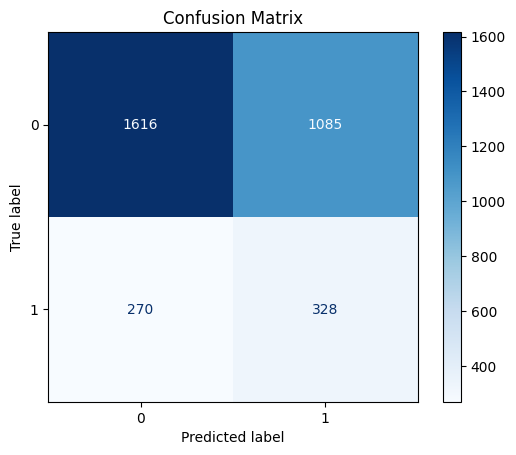

Data salah prediksi telah disimpan ke misclassified_glove_nb.csv
Accuracy: 0.65
F1 Score: 0.68


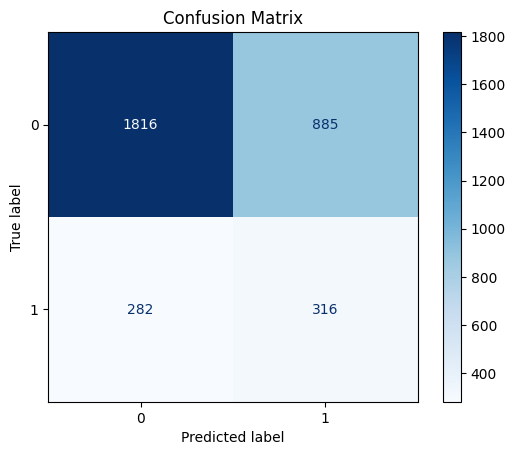

Data salah prediksi telah disimpan ke misclassified_glove_svm.csv
Accuracy: 0.43
F1 Score: 0.47


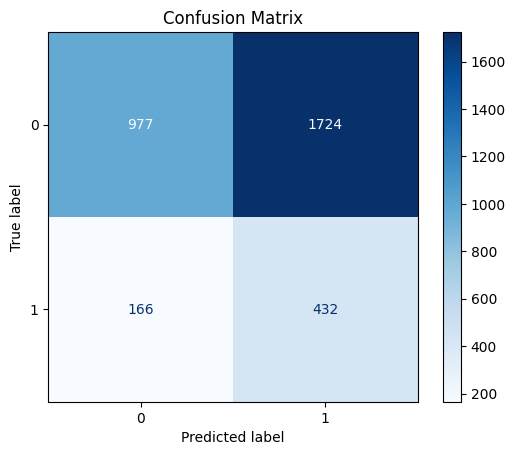

Data salah prediksi telah disimpan ke misclassified_glove_knn.csv


In [ ]:
evaluate_model('models/GloVe_Random Forest.pkl', features_glove, df_train, 'misclassified_glove_rf.csv')
evaluate_model('models/GloVe_Naive Bayes.pkl', features_glove, df_train, 'misclassified_glove_nb.csv')
evaluate_model('models/GloVe_SVM.pkl', features_glove, df_train, 'misclassified_glove_svm.csv')
evaluate_model('models/GloVe_KNN.pkl', features_glove, df_train, 'misclassified_glove_knn.csv')

### FastText

In [19]:
from gensim.models import KeyedVectors
import numpy as np

def extract_fasttext(X_test, fasttext_path):
    # Memuat model FastText
    fasttext_model = KeyedVectors.load_word2vec_format(fasttext_path)
    
    # Tokenisasi teks menjadi list kata-kata
    tokenized_test = [text.split() for text in X_test]
    
    # Menghitung rata-rata vektor kata per teks
    test_features = np.array([
        np.mean([fasttext_model.get_vector(word) for word in words if word in fasttext_model]
                or [np.zeros(fasttext_model.vector_size)], axis=0)
        for words in tokenized_test
    ])
    
    return test_features
# Path ke file model FastText yang telah dilatih
fasttext_path = 'cc.id.300.vec'

# Mengekstrak fitur dengan FastText
features_fasttext = extract_fasttext(X, fasttext_path)


Accuracy: 0.68
F1 Score: 0.71


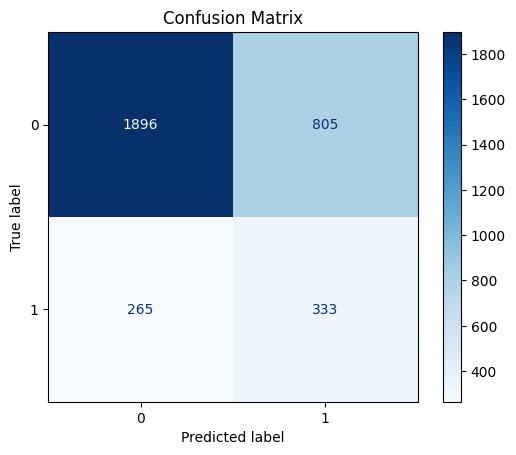

Data salah prediksi telah disimpan ke misclassified_fasttext_rf.csv
Accuracy: 0.42
F1 Score: 0.46


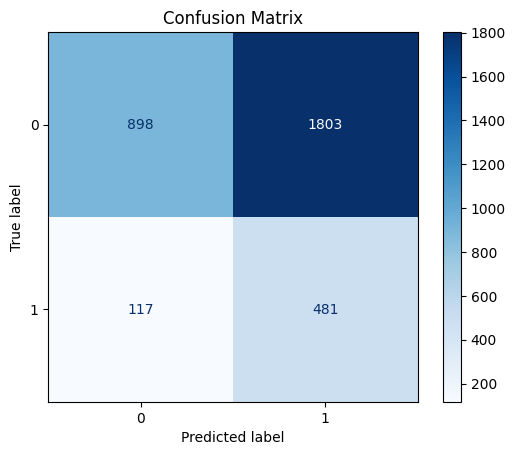

Data salah prediksi telah disimpan ke misclassified_fasttext_nb.csv
Accuracy: 0.67
F1 Score: 0.71


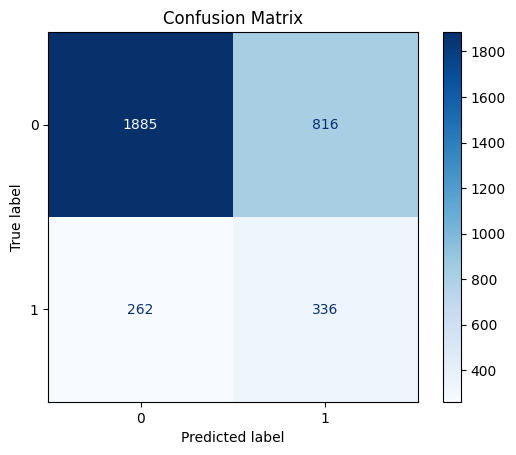

Data salah prediksi telah disimpan ke misclassified_fasttext_svm.csv
Accuracy: 0.54
F1 Score: 0.59


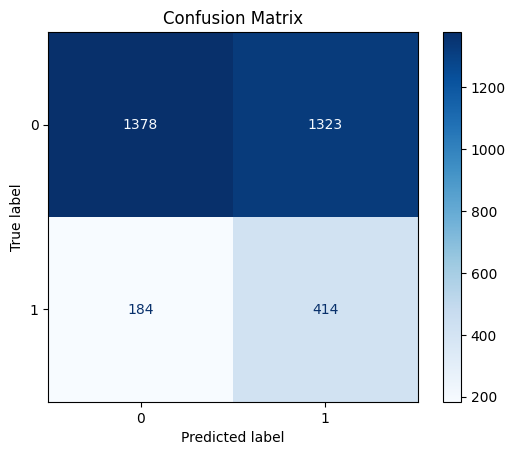

Data salah prediksi telah disimpan ke misclassified_fasttext_knn.csv


In [ ]:
evaluate_model('models/FastText_Random Forest.pkl', features_fasttext, df_train, 'misclassified_fasttext_rf.csv')
evaluate_model('models/FastText_Naive Bayes.pkl', features_fasttext, df_train, 'misclassified_fasttext_nb.csv')
evaluate_model('models/FastText_SVM.pkl', features_fasttext, df_train, 'misclassified_fasttext_svm.csv')
evaluate_model('models/FastText_KNN.pkl', features_fasttext, df_train, 'misclassified_fasttext_knn.csv')

### IndoBERT

In [21]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

def extract_indobert(X_test, model_name='indobenchmark/indobert-base-p2', batch_size=32):
    # Periksa perangkat yang tersedia
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Muat tokenizer dan model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name).to(device)
    model.eval()  # Set model ke mode evaluasi
    
    # Fungsi untuk memproses batch
    def embed_batch(texts):
        tokenized = tokenizer(list(texts), padding=True, truncation=True, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = model(**tokenized)
        return outputs.last_hidden_state[:, 0, :].cpu().numpy()  # CLS token
    
    # Proses dalam batch
    features = []
    for i in range(0, len(X_test), batch_size):
        batch_texts = X_test[i:i + batch_size]
        batch_features = embed_batch(batch_texts)
        features.append(batch_features)
    
    # Gabungkan semua batch menjadi satu array
    return np.vstack(features)

# Panggil fungsi extract_indobert
features_idbert = extract_indobert(X, batch_size=16)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Accuracy: 0.70
F1 Score: 0.73


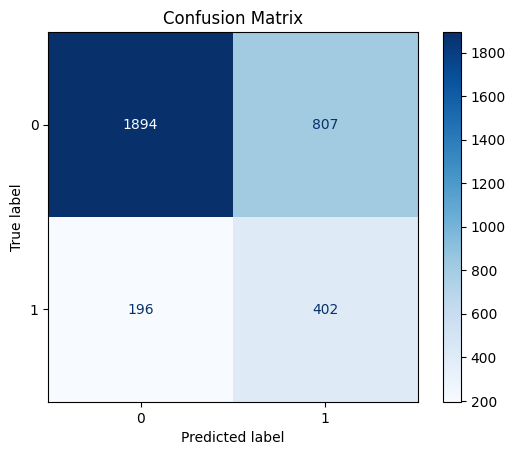

Data salah prediksi telah disimpan ke misclassified_idbert_rf.csv
Accuracy: 0.80
F1 Score: 0.78


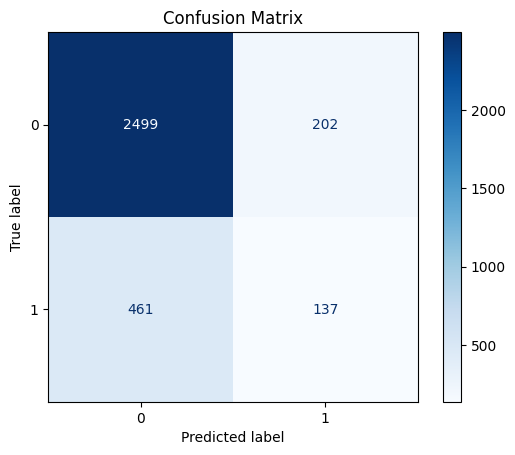

Data salah prediksi telah disimpan ke misclassified_idbert_nb.csv
Accuracy: 0.71
F1 Score: 0.74


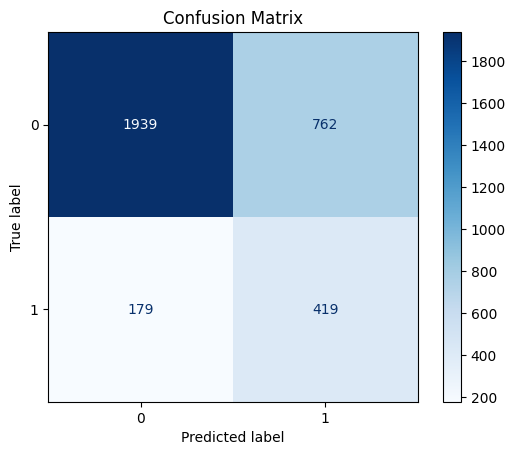

Data salah prediksi telah disimpan ke misclassified_idbert_svm.csv
Accuracy: 0.71
F1 Score: 0.74


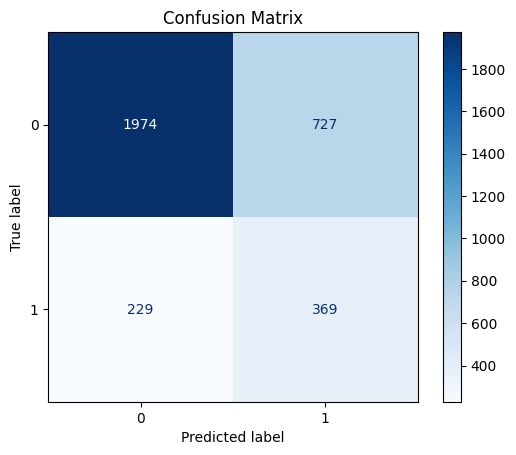

Data salah prediksi telah disimpan ke misclassified_idbert_knn.csv


In [ ]:
evaluate_model('models/IndoBERT_Random Forest.pkl', features_idbert, df_train, 'misclassified_idbert_rf.csv')
evaluate_model('models/IndoBERT_Naive Bayes.pkl', features_idbert, df_train, 'misclassified_idbert_nb.csv')
evaluate_model('models/IndoBERT_SVM.pkl', features_idbert, df_train, 'misclassified_idbert_svm.csv')
evaluate_model('models/IndoBERT_KNN.pkl', features_idbert, df_train, 'misclassified_idbert_knn.csv')